# PROBLEM STATEMENT

##### Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

##### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

##### Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.
	

# Data Dictionary

* Column Name : Description
* country : Name of the country
* child_mort : Death of children under 5 years of age per 1000 live births
* exports : Exports of goods and services per capita. Given as %age of the GDP per capita
* health : Total health spending per capita. Given as %age of GDP per capita
* imports : Imports of goods and services per capita. Given as %age of the GDP per capita
* Income : Net income per person
* Inflation : The measurement of the annual growth rate of the Total GDP
* life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same
* total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.


# Importing Nessarray Libraries for the Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import euclidean_distances

import warnings
warnings.filterwarnings('ignore')

# Explore the data

In [2]:
# Import the data 
data = pd.read_csv("Country-data.csv")

In [3]:
# View the 1st five records of the data
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

# Lets look for any significant relations in columns

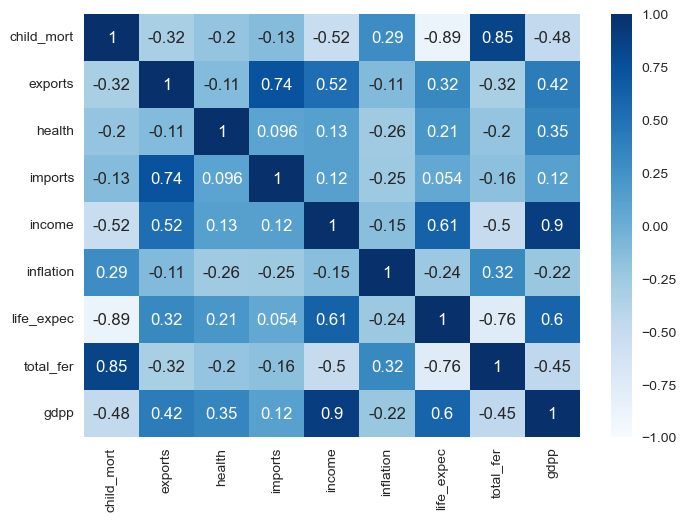

In [4]:
# Polt Heat Map
sns.heatmap(data.corr(numeric_only=True), vmax = 1, vmin = -1, cmap = "Blues", annot = True)
plt.show()

# Inference from Heat Map

#### There is good correlation between: 

1] imports and exports.

2] life_expec and income.

3] life_expec and gdpp.

4] child_mort and total_fer.

# Distribution of the numeric columns

In [5]:
# Checking the distribution via Distplot
t = 1
plt.figure(figsize = (10, 10))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3, 3, t)
    sns.distplot(data[i])
    plt.title(f'{i} : Skewness = {round(data[i].skew(), 2)}')
    t += 1
plt.tight_layout()    
plt.show()

# Check for Missing Values

In [6]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# There is no missing records

# Check for outliers

##### Before Treating Outliers

In [8]:
t = 1
plt.figure(figsize = (10, 10))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3, 3, t)
    sns.boxplot(data = data, x = i)
    plt.title(f'{i} : Skewness = {round(data[i].skew(), 2)}')
    t += 1
plt.tight_layout()    
plt.show()

# As the data is already very less, we will use percentile to cap the outliers.

In [9]:
for i in data.select_dtypes(np.number).columns:
    ul = np.percentile(data[i], 99)
    ll = np.percentile(data[i], 1)
    data[i] = np.where(data[i] > ul, ul, data[i])
    data[i] = np.where(data[i] < ll, ll, data[i])
    

#### After Treating Outliers

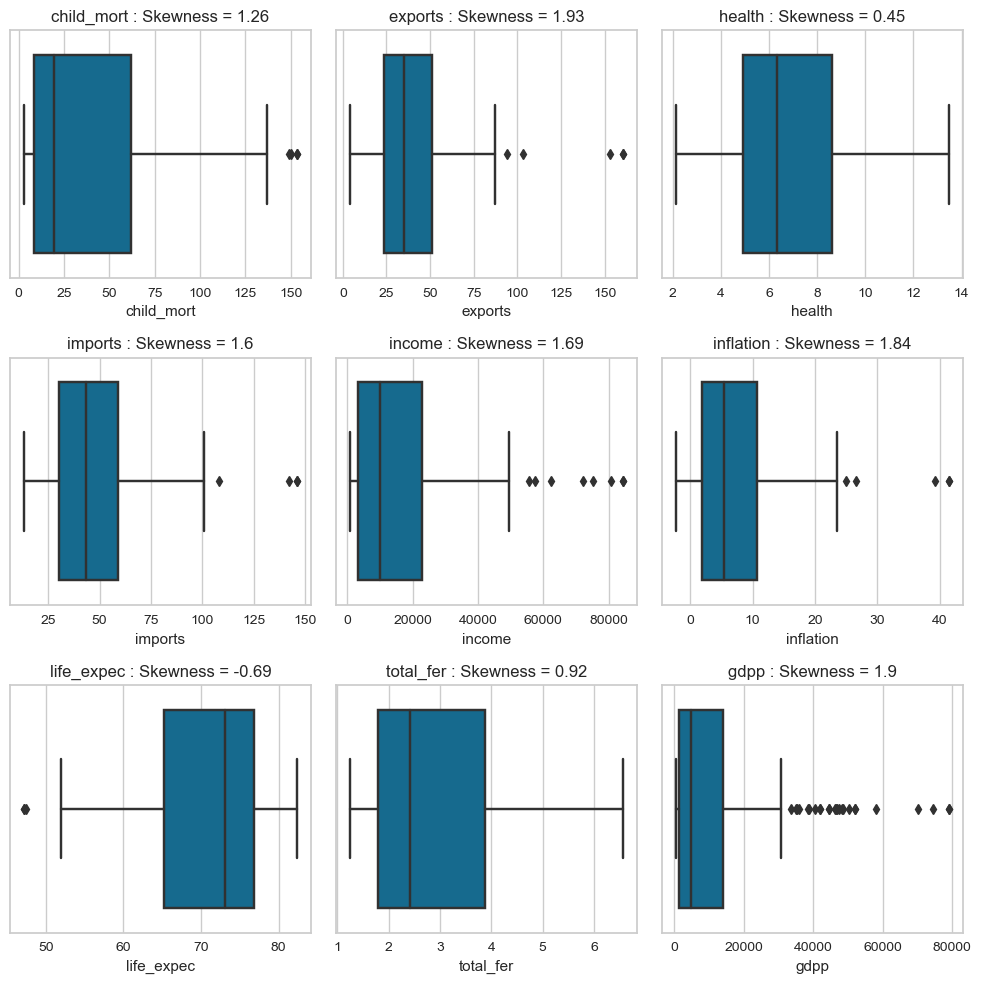

In [10]:
t = 1
plt.figure(figsize = (10, 10))
for i in data.select_dtypes(np.number).columns:
    plt.subplot(3, 3, t)
    sns.boxplot(data = data, x = i)
    plt.title(f'{i} : Skewness = {round(data[i].skew(), 2)}')
    t += 1
plt.tight_layout()    
plt.show()

# Scale the data

In [11]:
# Feature Engineering.
# We will drop country because it's a categorical data.
data_ = data.drop(columns = ['country'])

In [12]:
# Initialize the StandardScaler
sc = StandardScaler()

In [13]:
# Let's fit_transform data_
data_s = sc.fit_transform(data_)

# We will convert it into Data Frame.
data_s = pd.DataFrame(data_s, columns = data_.columns)

# Print 1st few records.
data_s.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.344012 -1.202883  0.300762 -0.080933 -0.851772   0.263649   -1.693799   
1   -0.547543 -0.500319 -0.090190  0.080055 -0.387025  -0.375251    0.663053   
2   -0.272548 -0.094393 -0.993555 -0.668322 -0.221124   1.123260    0.686504   
3    2.084186  0.838457 -1.494581 -0.167954 -0.612136   1.936405   -1.236499   
4   -0.709457  0.182730 -0.287564  0.528210  0.125202  -0.768917    0.721681   

   total_fer      gdpp  
0   1.926928 -0.702314  
1  -0.865911 -0.498775  
2  -0.035427 -0.477483  
3   2.154642 -0.531000  
4  -0.544433 -0.032079

# Let's do Pair Plot with the Scaled Data

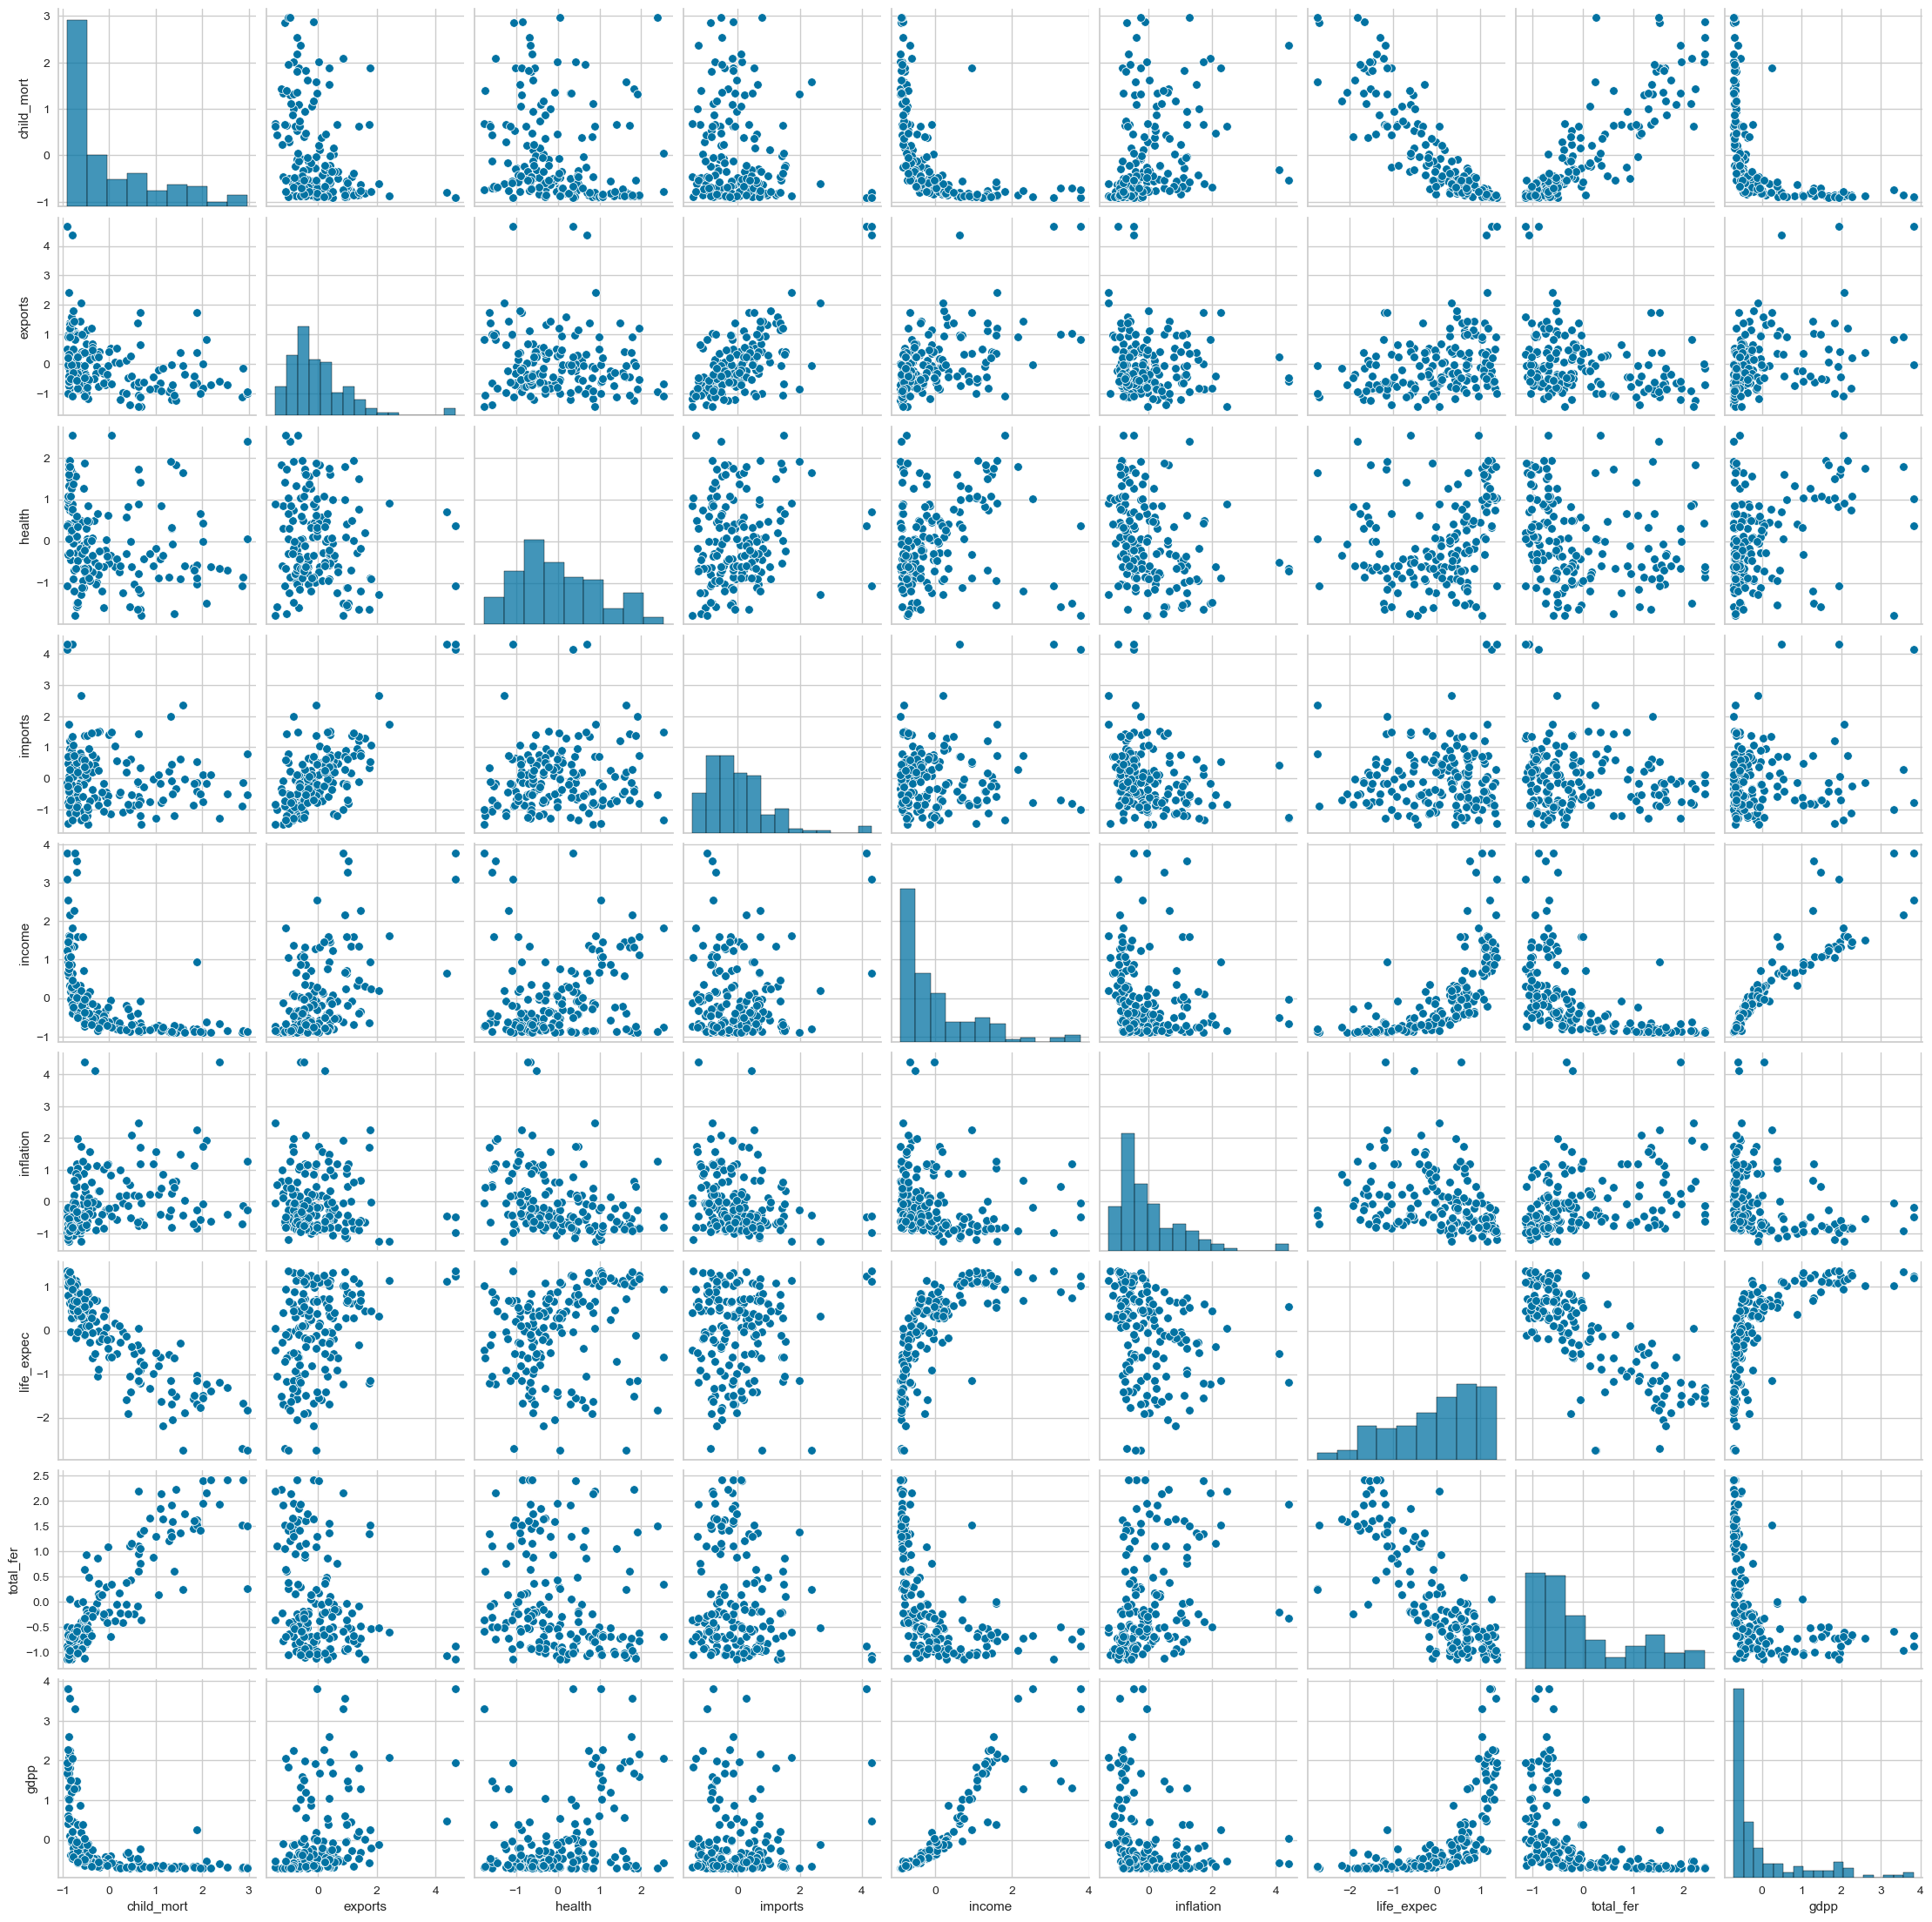

In [14]:
# Plot Pairplot
sns.pairplot(data_s)
plt.show()

# Principal Components Analysis - PCA

In [15]:
# Initialize PCA
pca = PCA(n_components = 9)

In [16]:
# Fit the
pca.fit(data_s)

PCA(n_components=9)

In [17]:
pca.explained_variance_

array([4.27823733, 1.53037471, 1.21746675, 0.96172041, 0.61715173,
       0.18503179, 0.12391253, 0.08721568, 0.05310593])

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.47251324, 0.64153666, 0.77600072, 0.88221867, 0.95038048,
       0.97081645, 0.98450207, 0.99413467, 1.        ])

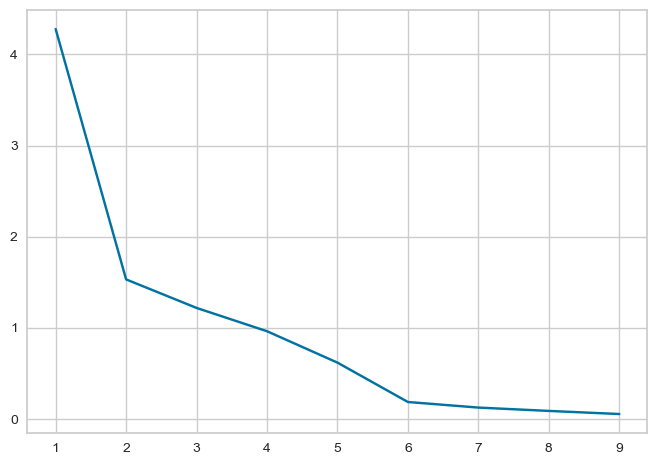

In [19]:
plt.plot(range(1, 10), pca.explained_variance_)
plt.show()

# Let's go with 4 PC's

In [20]:
pca = PCA(n_components = 4)
data_pca = pca.fit_transform(data_s)

# Let's create a Data Frame
data_pca = pd.DataFrame(data_pca, columns = range(1, 5))

data_pca

1         2         3         4
0   -3.025658 -0.003637 -0.869758  0.963519
1    0.452028 -0.513954 -0.256504 -1.274491
2   -0.375785 -0.464859  1.530583 -0.697769
3   -3.166567  1.602272  1.772517  1.270583
4    1.107019  0.231739 -0.207497 -0.860967
..        ...       ...       ...       ...
162 -0.835382  0.705868 -0.372782 -0.706413
163 -0.764815 -1.346997  3.566874  0.136890
164  0.436635  1.595775  0.045564 -1.100618
165 -2.091453 -0.180723  1.421573  0.234704
166 -3.019891  0.387956  0.256735  0.953016

[167 rows x 4 columns]

# K-Means Clustering

In [21]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
wcss = [] # WCSS, Inertia, Dis
for i in n_clusters:
    model = KMeans(n_clusters = i)
    model.fit(data_pca)
    wcss.append(model.inertia_)

In [23]:
wcss

[848.7987585063244,
 627.7064017457415,
 516.5118044512926,
 432.2833062555506,
 380.33534964901185,
 335.34420578792026,
 303.67855746705976,
 275.3383442623035]

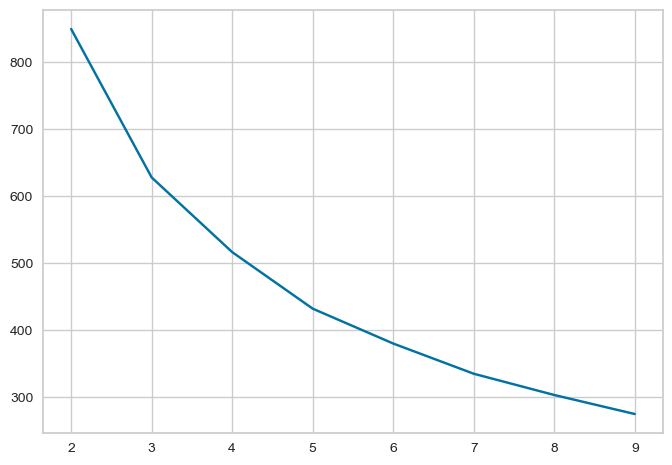

In [24]:
# K-Elbow Plot
plt.plot(n_clusters, wcss)
plt.show()

In [25]:
kelbow = KElbowVisualizer(KMeans(), k = 9)

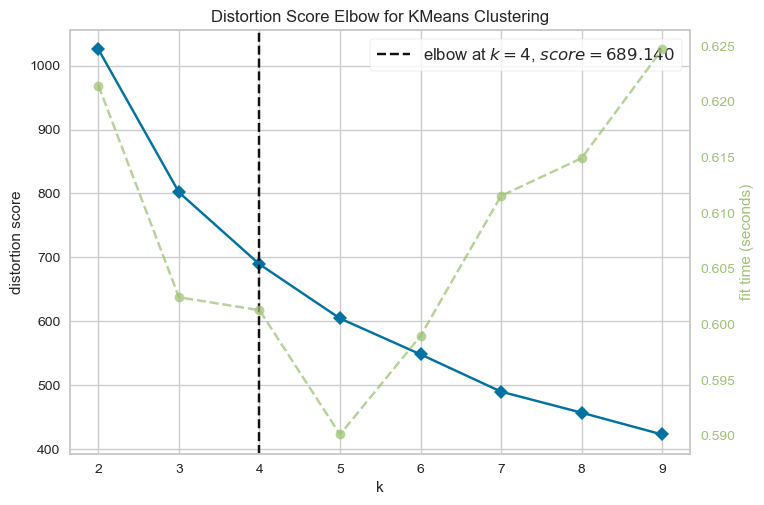

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kelbow.fit(data_s)
kelbow.show()

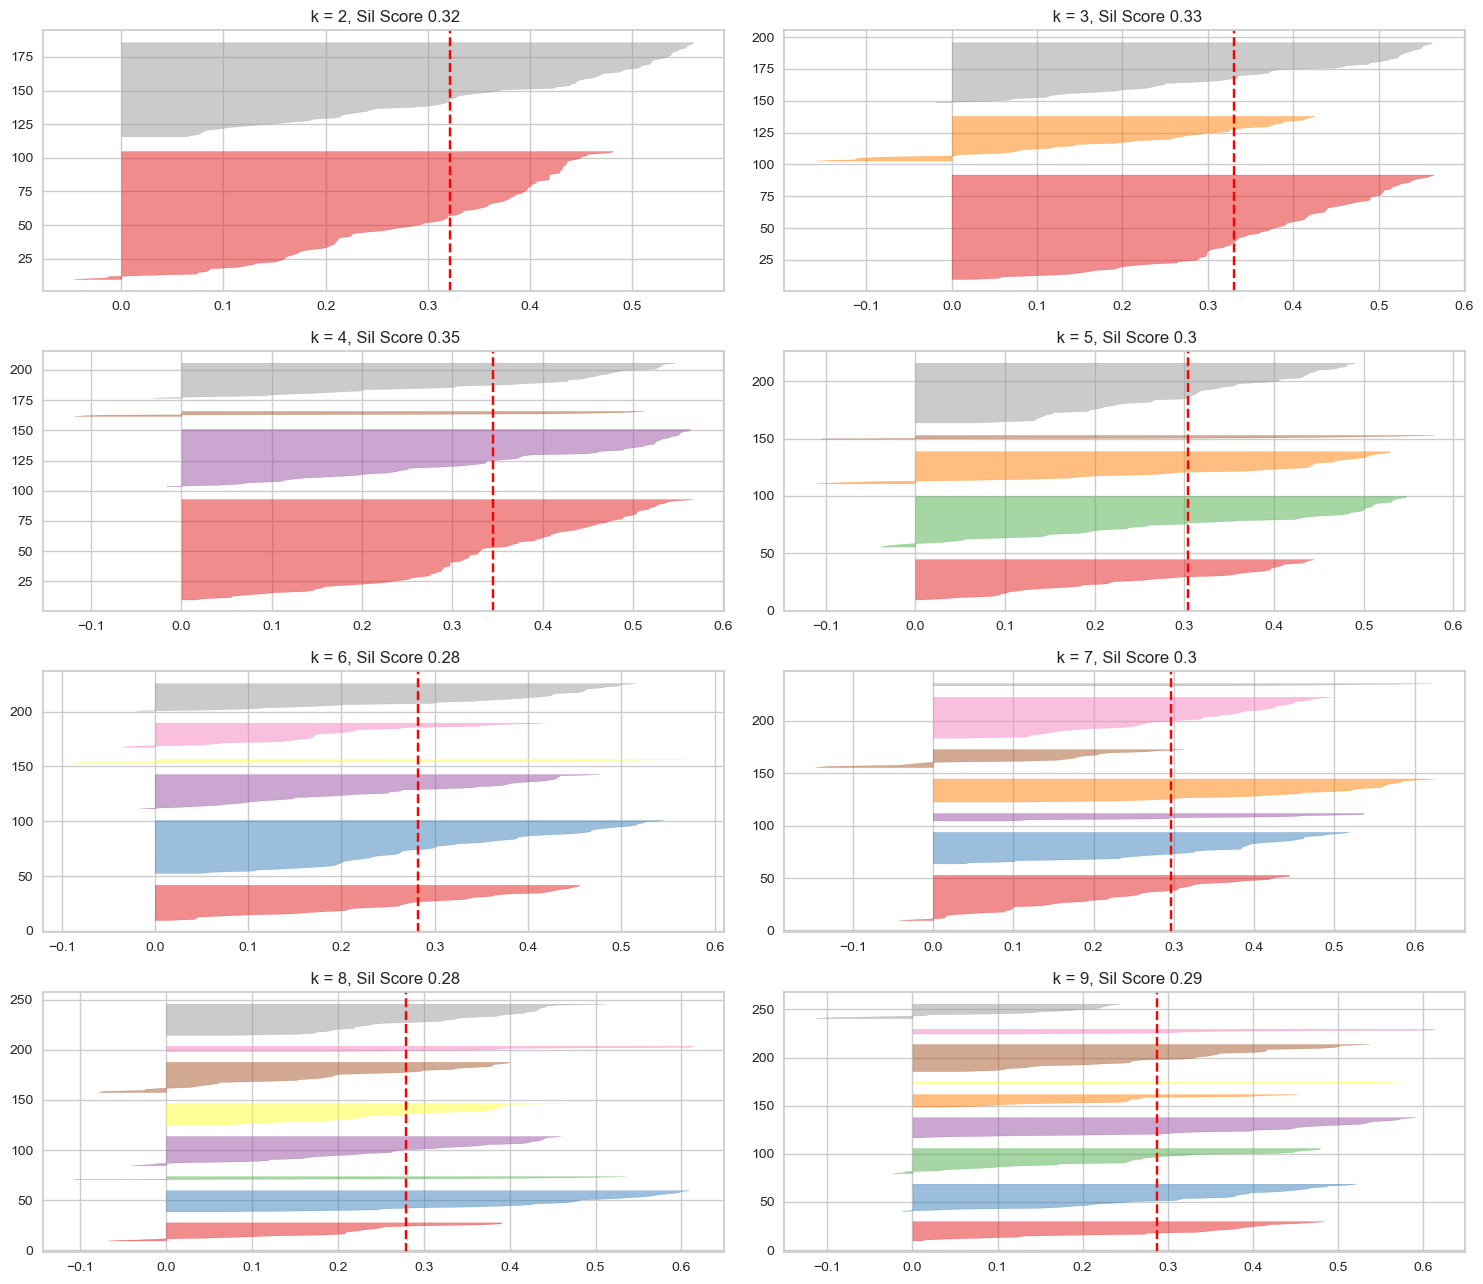

In [27]:
t = 1
plt.figure(figsize = (15, 13))

for i in n_clusters:
    plt.subplot(4, 2, t)

    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    plt.title(f' k = {i}, Sil Score {round(sil_viz.silhouette_score_, 2)}')
    t += 1
plt.tight_layout()
plt.show()

In [28]:
# Let's go with K = 3

In [29]:
k_means = KMeans(n_clusters = 3)

In [30]:
pred_kmeans = k_means.fit_predict(data_pca)

In [31]:
pred_kmeans

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [32]:
clusters = k_means.cluster_centers_

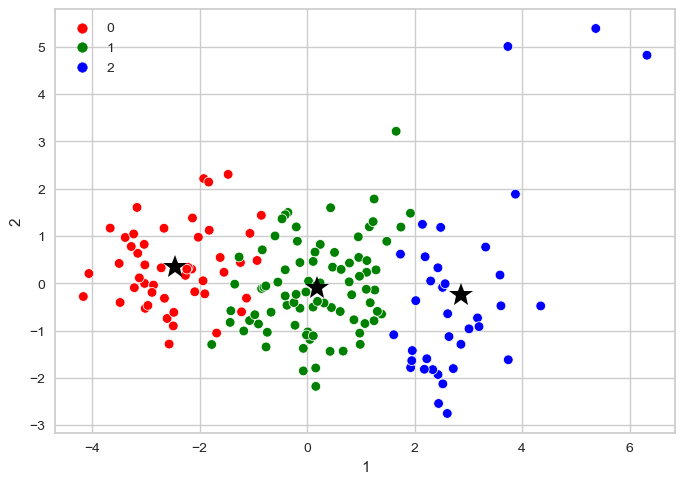

In [33]:
sns.scatterplot(x = data_pca[1], y = data_pca[2], hue = pred_kmeans, palette = ['red', 'green', 'blue'])

for i in range(3):
    plt.plot(clusters[i][0], clusters[i][1], marker = '*', ms = 18, color = 'black')

# Agglomerative Clustering

In [34]:
data_pca.shape

(167, 4)

In [35]:
dist_mat = euclidean_distances(data_pca)
actual_dist = dist_mat[np.triu_indices(167, k = 1)]

In [36]:
def draw_dendrogram(link_method):
    
    link_mat = linkage(data_pca,method = link_method,metric = 'euclidean')
    coeff,_ = cophenet(link_mat,actual_dist)
    plt.title(f'Dendrogram : method = {link_method},coeff = {coeff}')
    dendrogram(link_mat)
    plt.show()    

In [37]:
draw_dendrogram('single')

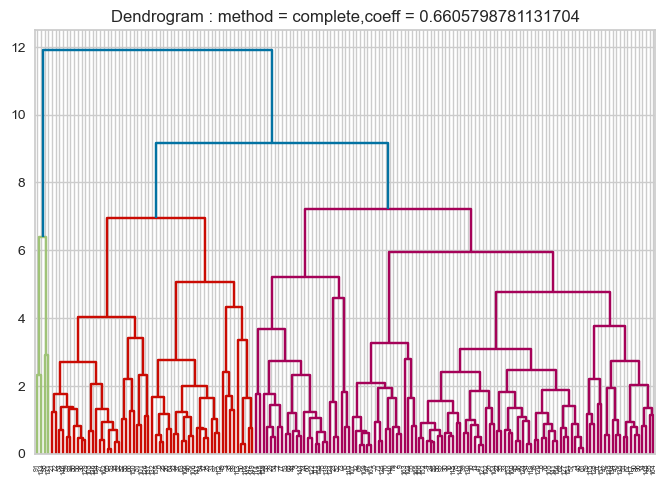

In [38]:
draw_dendrogram('complete')

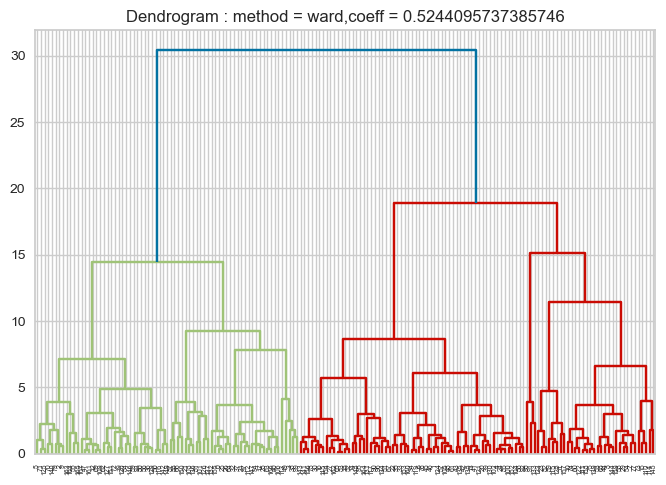

In [39]:
draw_dendrogram('ward')

In [40]:
draw_dendrogram('average')

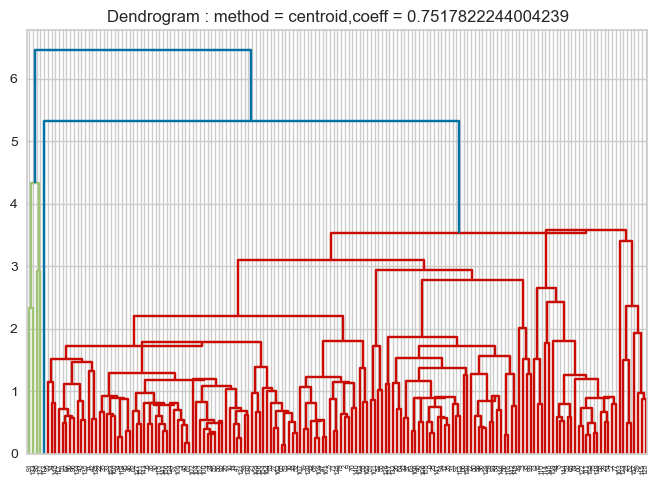

In [41]:
draw_dendrogram('centroid') # Inversion points is the Draw Back

In [42]:
# Finalizing model
# 1] complete 
# 2] Ward

In [43]:
# Model 1: method - 'complete', k = 3
# Model 2: method - 'ward', k = 2

In [44]:
# Let's calculate for den

In [45]:
# method - 'ward'
model_1 = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

pred = model_1.fit_predict(data_pca)
print(silhouette_score(data_pca, pred))

0.3126115454512045


In [46]:
# method - 'complete'
model_2 = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

pred = model_2.fit_predict(data_pca)
print(silhouette_score(data_pca, pred))

0.31870552955617404


In [47]:
model_agglo = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

In [48]:
pred_agglo = model_agglo.fit_predict(data_pca)

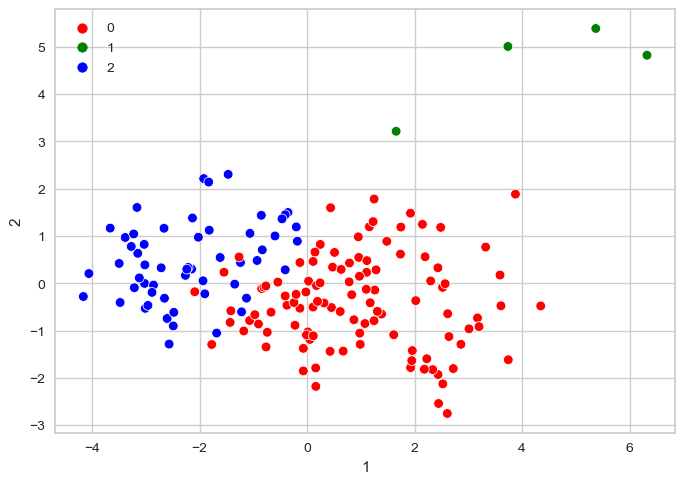

In [49]:
sns.scatterplot(x = data_pca[1], y = data_pca[2], hue = pred_agglo, palette = ['red', 'green', 'blue'])
plt.show()

# Final Model

In [50]:
pd.Series(pred_kmeans).value_counts().plot(kind = 'bar')
plt.show()

In [51]:
pd.Series(pred_agglo).value_counts().plot(kind = 'bar')
plt.show()

1] The distribution in K-Means is even and we are getting good data points in cluster. While in Agglomerative Clustering 1 is only getting 4 data points.

2] The silhouette score is better ~ 0.33 in K-Means and ~ 0.31 in Agglomerative Clustering.

On the basis these two points it's to better to go with K-Means clustering with k = 3.

In [52]:
# Put the prediction from final model to the original data

In [53]:
data['Label'] = pred_kmeans

In [54]:
data

country  child_mort  exports  health  imports   income  \
0            Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1                Albania        16.6     28.0    6.55     48.6   9930.0   
2                Algeria        27.3     38.4    4.17     31.4  12900.0   
3                 Angola       119.0     62.3    2.85     42.9   5900.0   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   
..                   ...         ...      ...     ...      ...      ...   
162              Vanuatu        29.2     46.6    5.25     52.7   2950.0   
163            Venezuela        17.1     28.5    4.91     17.6  16500.0   
164              Vietnam        23.3     72.0    6.84     80.2   4490.0   
165                Yemen        56.3     30.0    5.18     34.4   4480.0   
166               Zambia        83.1     37.0    5.89     30.9   3280.0   

     inflation  life_expec  total_fer     gdpp  Label  
0        9.440        56.2       5.82    553.0      0  
1        4.490        76.3       1.65   4090.0      1  
2       16.100        76.5       2.89   4460.0      1  
3       22.400        60.1       6.16   3530.0      0  
4        1.440        76.8       2.13  12200.0      1  
..         ...         ...        ...      ...    ...  
162      2.620        63.0       3.50   2970.0      1  
163     41.478        75.4       2.47  13500.0      1  
164     12.100        73.1       1.95   1310.0      1  
165     23.600        67.5       4.67   1310.0      0  
166     14.000        52.0       5.40   1460.0      0  

[167 rows x 11 columns]

# Business Interpretation

In [55]:
num_cols = data.select_dtypes(np.number).columns
num_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'Label'],
      dtype='object')

In [56]:
data.groupby(by = 'Label')[num_cols].mean()

child_mort    exports    health    imports        income  inflation  \
Label                                                                        
0       90.335417  29.606654  6.433542  43.133333   3901.010000  10.608604   
1       21.853012  40.180595  6.165733  47.237060  12432.409639   7.579581   
2        5.005556  57.237778  8.693494  50.496111  44340.222222   2.695450   

       life_expec  total_fer          gdpp  Label  
Label                                              
0       59.567083   4.972233   1911.400833    0.0  
1       72.948193   2.284217   6549.060241    1.0  
2       80.106667   1.755733  41532.666667    2.0

In [57]:
# Let's call 0 --> Developed, 1 --> Underdevelop, 2 --> Developing

In [58]:
data['Label'] = data['Label'].map({0 : 'Developed', 1 : 'Underdevelop', 2 : 'Developing'})

In [59]:
data

country  child_mort  exports  health  imports   income  \
0            Afghanistan        90.2     10.0    7.58     44.9   1610.0   
1                Albania        16.6     28.0    6.55     48.6   9930.0   
2                Algeria        27.3     38.4    4.17     31.4  12900.0   
3                 Angola       119.0     62.3    2.85     42.9   5900.0   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0   
..                   ...         ...      ...     ...      ...      ...   
162              Vanuatu        29.2     46.6    5.25     52.7   2950.0   
163            Venezuela        17.1     28.5    4.91     17.6  16500.0   
164              Vietnam        23.3     72.0    6.84     80.2   4490.0   
165                Yemen        56.3     30.0    5.18     34.4   4480.0   
166               Zambia        83.1     37.0    5.89     30.9   3280.0   

     inflation  life_expec  total_fer     gdpp         Label  
0        9.440        56.2       5.82    553.0     Developed  
1        4.490        76.3       1.65   4090.0  Underdevelop  
2       16.100        76.5       2.89   4460.0  Underdevelop  
3       22.400        60.1       6.16   3530.0     Developed  
4        1.440        76.8       2.13  12200.0  Underdevelop  
..         ...         ...        ...      ...           ...  
162      2.620        63.0       3.50   2970.0  Underdevelop  
163     41.478        75.4       2.47  13500.0  Underdevelop  
164     12.100        73.1       1.95   1310.0  Underdevelop  
165     23.600        67.5       4.67   1310.0     Developed  
166     14.000        52.0       5.40   1460.0     Developed  

[167 rows x 11 columns]

In [60]:
# Developed
data[data['Label'] == 'Developed']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [61]:
# Developing
data[data['Label'] == 'Developing']['country']

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

In [62]:
# Underdevelop
data[data['Label'] == 'Underdevelop']['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 83, dtype: object

# World Map

In [63]:
fig = px.choropleth(data[['country', 'Label']], locationmode = 'country names', locations = 'country', color = 'Label', 
                    color_discrete_map = {'Developed' : 'lightblue', 'Underdevelop' : 'red', 'Developing' : 'green'})

fig.show()